In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_pickle("./6years.pkl")

In [3]:
dataset = dataset.reset_index(drop=True)
print (dataset)

         CDateTime SalesPoint  SalesChannelKey         GroupCat ItemSize  \
0       2013-01-01      FDHOR                5      FLOOR TILES        A   
1       2013-01-01      FDKEG                5       WALL TILES        G   
2       2013-01-01      FDKEG                5       WALL TILES        G   
3       2013-01-01      FDNIT                5      FLOOR TILES        M   
4       2013-01-01      FDNIT                5      FLOOR TILES        P   
5       2013-01-01      FDPND                5       WALL TILES        D   
6       2013-01-01      FDPND                5       WALL TILES        S   
7       2013-01-01      LWSR                 4       WALL TILES        T   
8       2013-01-01      LWSR                 4       WALL TILES        D   
9       2013-01-01      FDHOR                5       WALL TILES        D   
10      2013-01-01      KDSR                 5       WALL TILES        D   
11      2013-01-01      KDSR                 5      FLOOR TILES        A   
12      2013

In [4]:
FloorTiles_data = dataset.loc[dataset.GroupCat=='FLOOR TILES'].reset_index(drop=True)
print (FloorTiles_data)

         CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0       2013-01-01      FDHOR                5  FLOOR TILES        A   
1       2013-01-01      FDNIT                5  FLOOR TILES        M   
2       2013-01-01      FDNIT                5  FLOOR TILES        P   
3       2013-01-01      KDSR                 5  FLOOR TILES        A   
4       2013-01-01      LWSR                 4  FLOOR TILES        P   
...            ...        ...              ...          ...      ...   
1401505 2018-12-31      FDAMB                5  FLOOR TILES        A   
1401506 2018-12-31      FDAMB                5  FLOOR TILES        T   
1401507 2018-12-31      FDJEL                5  FLOOR TILES        X   
1401508 2018-12-31      FDBA1                5  FLOOR TILES        T   
1401509 2018-12-31      FDBA1                5  FLOOR TILES        T   

         DiscountPcnt    QTY  
0                10.0   14.0  
1                25.0    1.0  
2                25.0    2.0  
3          

In [5]:
FloorTiles_data.to_pickle("./Floortiles.pkl")

In [2]:
FloorTiles_data = pd.read_pickle("./Floortiles.pkl")
print (FloorTiles_data)

         CDateTime SalesPoint  SalesChannelKey     GroupCat ItemSize  \
0       2013-01-01      FDHOR                5  FLOOR TILES        A   
1       2013-01-01      FDNIT                5  FLOOR TILES        M   
2       2013-01-01      FDNIT                5  FLOOR TILES        P   
3       2013-01-01      KDSR                 5  FLOOR TILES        A   
4       2013-01-01      LWSR                 4  FLOOR TILES        P   
5       2013-01-01      LWSR                 4  FLOOR TILES        U   
6       2013-01-01      LWSR                 4  FLOOR TILES        V   
7       2013-01-01      FDMTU                5  FLOOR TILES        U   
8       2013-01-01      FDJAF                5  FLOOR TILES        M   
9       2013-01-01      DELUN                2  FLOOR TILES        U   
10      2013-01-01      CAMAT                4  FLOOR TILES        U   
11      2013-01-01      DELUN                3  FLOOR TILES        X   
12      2013-01-01      DELUN                3  FLOOR TILES     

In [10]:
FloorTiles_data['QTY'].describe().apply(lambda x: format(x, 'f'))

count    1401510.000000
mean         178.106731
std          474.166049
min            1.000000
25%           15.000000
50%           58.000000
75%          170.000000
max        77760.000000
Name: QTY, dtype: object

In [3]:
del (FloorTiles_data['GroupCat'])
print (FloorTiles_data)

         CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt    QTY
0       2013-01-01      FDHOR                5        A          10.0   14.0
1       2013-01-01      FDNIT                5        M          25.0    1.0
2       2013-01-01      FDNIT                5        P          25.0    2.0
3       2013-01-01      KDSR                 5        A          10.0   60.0
4       2013-01-01      LWSR                 4        P          25.0   50.0
5       2013-01-01      LWSR                 4        U          10.0   15.0
6       2013-01-01      LWSR                 4        V          15.0   60.0
7       2013-01-01      FDMTU                5        U          10.0  111.0
8       2013-01-01      FDJAF                5        M          25.0   57.0
9       2013-01-01      DELUN                2        U          81.0   37.0
10      2013-01-01      CAMAT                4        U           0.0    5.0
11      2013-01-01      DELUN                3        X           0.0  173.0

In [6]:
FloorTiles_data['DiscountPcnt'].describe().apply(lambda x: format(x, 'f'))

count    1399203.000000
mean           8.990914
std           17.861999
min          -30.500000
25%            0.000000
50%            0.000000
75%           10.000000
max          100.000000
Name: DiscountPcnt, dtype: object

In [7]:
FloorTiles_data['QTY'].describe().apply(lambda x: format(x, 'f'))

count    1401510.000000
mean         178.106731
std          474.166049
min            1.000000
25%           15.000000
50%           58.000000
75%          170.000000
max        77760.000000
Name: QTY, dtype: object

In [4]:
FloorTiles_data = FloorTiles_data[(FloorTiles_data.SalesPoint != 'DELUN')]
FloorTiles_data = FloorTiles_data[(FloorTiles_data.SalesPoint != 'LWSR ')]

In [25]:
x=sorted(FloorTiles_data.ItemSize.unique())
print (x)
len(x)

['A', 'B', 'C', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


19

In [26]:
y=sorted(FloorTiles_data.SalesChannelKey.unique())
print (y)
len(y)

[-1, 1, 2, 4, 5, 7]


6

In [5]:
floor_names = FloorTiles_data['SalesPoint'].unique().tolist()
print (len(floor_names))

143


In [6]:
print (floor_names)

['FDHOR', 'FDNIT', 'KDSR ', 'FDMTU', 'FDJAF', 'CAMAT', 'FDWAP', 'FDAMB', 'FDMOT', 'CABLM', 'CARAP', 'FDPND', 'FDGAP', 'FDWAT', 'FDPER', 'FDWAR', 'FDKEG', 'CAKAN', 'FDMTL', 'CAGOG', 'FDAVI', 'FDMON', 'FDJFN', 'FDMAG', 'FDCHI', 'FDDAM', 'FDALU', 'FDKAD', 'FDVAV', 'CAPEL', 'CADAM', 'FDMAL', 'FDGAM', 'FDKUR', 'FDAMT', 'FDWEL', 'FDEMB', 'FDBA1', 'FDBA2', 'RS001', 'FDMIN', 'FDBAD', 'JWSR ', 'FDNEG', 'FDGAL', 'RS002', 'FDWEN', 'FDKDW', 'FDJEL', 'FDRAT', 'FDBAL', 'LPTEC', 'FDMHI', 'LPALL', 'LPMEG', 'FDKOT', 'LPSAH', 'FDAMP', 'DBRAT', 'LPLAS', 'DBNAW', 'LPSAM', 'LPSAD', 'LPWES', 'LPWLH', 'LPROY', 'LPAKF', 'LPCOS', 'DBPIL', 'LPSNF', 'LPABE', 'LPBAT', 'LPSTA', 'LPSWA', 'LPMAH', 'LPWCF', 'LPSRF', 'LPNAF', 'LPMTF', 'LPUMA', 'LPPH1', 'DBGAL', 'LPTC2', 'LPMH3', 'LPWH1', 'FDBDU', 'DBKIR', 'DBJF1', 'DBJF2', 'LPAS1', 'LPCH1', 'LPJAH', 'LPSC4', 'LPRL1', 'DBANU', 'LPAH3', 'DBNEG', 'DBALU', 'DBKEG', 'DBDIG', 'LPGL1', 'DBHOR', 'LPHB1', 'LPIG1', 'LPCB2', 'DBANG', 'LPWE9', 'LPLE1', 'LPSH9', 'LPWIC', 'DBCOL', 

In [7]:
floor_names = sorted(floor_names)
print (floor_names)

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCO3', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBNUG', 'DBPER', 'DBPIL', 'DBRAP', 'DBRAT', 'DBSAM', 'DBTHI', 'DBVAU', 'DBVAV', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDJFN', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKLT', 'FDKOT', 'FDKUR', 'FDMAG', 'FDMAL', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ', 'LPABE', 'LPAH3', 'LPAKF', 'LPALL', 'LPAS1', 'LPBAT', 'LPCB2', 'LPCC3', 'LPCH1', 'LPCOS', 'LPGL1', 'LPHB1', 'LPIG1', 'LPJAH', 'LPKLF', 'LPLAS', 

In [8]:
floor_datas = {}
for i, g in FloorTiles_data.groupby('SalesPoint'):
    floor_datas.update({'floor_' + str(i) : g.reset_index(drop=True)})
print ('end')

end


In [31]:
print (floor_datas['floor_CABLM'])

        CDateTime SalesPoint  SalesChannelKey ItemSize  DiscountPcnt    QTY
0      2013-01-01      CABLM                1        M           0.0   72.0
1      2013-01-01      CABLM                1        U           0.0    4.0
2      2013-01-01      CABLM                1        U           5.0  145.0
3      2013-01-01      CABLM                1        U           0.0  130.0
4      2013-01-01      CABLM                1        A           0.0  190.0
...           ...        ...              ...      ...           ...    ...
138512 2018-12-31      CABLM                1        Y           0.0  200.0
138513 2018-12-31      CABLM                1        A          30.0  510.0
138514 2018-12-31      CABLM                1        Y           0.0  384.0
138515 2018-12-31      CABLM                1        Y           0.0   22.0
138516 2018-12-31      CABLM                1        Y           0.0   13.0

[138517 rows x 6 columns]


In [9]:
print (len(floor_datas.keys()))

143


In [33]:
print (len(floor_datas['floor_FDHOR']))

12329


In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7
from sklearn.ensemble import RandomForestRegressor
plt.figure(figsize = (12, 9))
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
import datetime

floorFeature_matrix = pd.DataFrame()
floorLabel_matrix = pd.DataFrame()
floor_sp_num = 0
year_dic = {2013:0, 2014:1, 2015:2, 2016:3, 2017:4, 2018:5, 2019:6}
rem_list = list()
add_list = list()

arr = list()
floor_l = ['A','B','C','G','H','J','K','L','M','N','P','Q','S','T','U','V','W','X','Y']

for sp in floor_datas.keys():
    
    ######### Total sales #########
    sales = floor_datas[sp].filter(['CDateTime','QTY'], axis=1)   # extract QTYAbsolute column
    sales_aggre = sales.groupby('CDateTime').agg({'QTY':'sum'})
    #print (sales_aggre)

    t_index = pd.DatetimeIndex(start='2013-01-01', end='2018-12-31', freq='1D')
    sales_aggre = sales_aggre.reindex(t_index).fillna(0)
    #print (sales_aggre)

    sales_aggre = sales_aggre.QTY.resample('W').sum()       # convert daily to weekly
    sales_aggre = pd.DataFrame(sales_aggre)

    nonzero_weeks = (sales_aggre['QTY'] != 0).sum()
    if (nonzero_weeks < 24):
        rem_list.append(sp)
        continue
    add_list.append('Is'+sp[5:])
    
    ###############################
    
    ###### Weeks to New year ######
    f1 = sales_aggre.index.week
    f2 = list()
    yearNow=2013
    weeks_per_year=52
    newyear_week = datetime.date(2013, 4, 14).isocalendar()[1]  # Find the new year week
    con = True
    
    for i in range(len(f1)):
        if (con):
            x = newyear_week - f1[i]
        else:
            x = newyear_week + (weeks_per_year-f1[i])
            if (f1[i]==weeks_per_year):
                con=True
        if (x==0):
            weeks_per_year = datetime.date(yearNow, 12, 28).isocalendar()[1]
            newyear_week = datetime.date(yearNow+1, 4, 14).isocalendar()[1]
            yearNow += 1
            con=False
        f2.append(x)
    ################################
    
    ###### Weeks to Christmas ######
    f3 = list()
    yearNow=2013
    christmas_week = datetime.date(2013, 12, 25).isocalendar()[1]  # Find the Christmas week
    con = True
    
    for i in range(len(f1)):
        if (con==True):
            y = christmas_week - f1[i]
        else:
            y = christmas_week
            con=True
        if (y==0):
            if (f1[i]<datetime.date(yearNow+1, 1, 1).isocalendar()[1]):
                con=False
            christmas_week = datetime.date(yearNow+1, 12, 25).isocalendar()[1]
            yearNow += 1
        f3.append(y)
    ################################
    
    ############## Feature matrix, Label matrix & Heat Map ###############
    
    ################### Year, Month, Week ####################
    
    floor_features = pd.DataFrame(index=sales_aggre.index)     # store all features for one salespoint
    
    #features['WeeksToNewyear'] = w2
    
    floor_features['Year'] = pd.Series(sales_aggre.index.year, index=floor_features.index)     # Year
    labelencoder = LabelEncoder()
    floor_features.iloc[:, 0] = labelencoder.fit_transform(floor_features.iloc[:, 0])
     
    df_month = pd.DataFrame(sales_aggre.index.month)                                 # Month
    onehotencoder = OneHotEncoder(categorical_features = [0])
    array_month = onehotencoder.fit_transform(df_month).toarray() 
    df_month = pd.DataFrame(array_month, columns=['IsJan','IsFeb','IsMar','IsApr','IsMay','IsJun','IsJul','IsAug','IsSep','IsOct','IsNov','IsDec']).astype('int')
    df_month.index = floor_features.index
    floor_features = pd.concat([floor_features, df_month], axis=1)
        
    df_week = pd.DataFrame(sales_aggre.index.week)                                 # Week
    onehotencoder1 = OneHotEncoder(categorical_features = [0])
    array_week = onehotencoder.fit_transform(df_week).toarray() 
    df_week = pd.DataFrame(array_week, columns=[('Isweek '+str(i)) for i in range(1,54)]).astype('int')
    df_week.index = floor_features.index
    floor_features = pd.concat([floor_features, df_week], axis=1)
    
    ##########################################################
    
    floor_features['WeeksToNewyear'] = f2
    floor_features['WeeksToChristmas'] = f3
    
    ################ Customer behavior & QTYs ################
    
    subFrame = floor_datas[sp].filter(['CDateTime','SalesChannelKey','ItemSize','QTY'], axis=1)    # extract channel and 2 other columns
    weeks = [g for n, g in subFrame.set_index('CDateTime').groupby(pd.Grouper(freq='W'))]    # weekly dataframes
    start_year = (subFrame['CDateTime'].dt.year).iloc[0]
    start_week_of_year = (subFrame['CDateTime'].dt.week).iloc[0]
    weeks_of_before_years = 0
    
    for i in range(0, year_dic[start_year]):
        weeks_per_year = datetime.date(list(year_dic.keys())[list(year_dic.values()).index(i)], 12, 28).isocalendar()[1]  #list(year_dic.keys())[list(year_dic.values()).index(0)]
        weeks_of_before_years = weeks_of_before_years + weeks_per_year
    start_week = weeks_of_before_years + start_week_of_year
    print (floor_sp_num+1, sp, start_week)
        
    #counts = [[weeks[i]['SalesChannelKey'].value_counts(normalize=True)] for i in range(len(weeks))]     # customer cat. percents for each week
    
    floor_chan = np.zeros((sales_aggre.shape[0], 11))       # matrix for store channel percents for each week (one salespoint)
    
    floor_keys = ['FloorTiles A','FloorTiles B','FloorTiles C','FloorTiles G','FloorTiles H','FloorTiles J','FloorTiles K','FloorTiles L','FloorTiles M',
                'FloorTiles N','FloorTiles P','FloorTiles Q','FloorTiles S','FloorTiles T','FloorTiles U','FloorTiles V',
                'FloorTiles W','FloorTiles X','FloorTiles Y']
    
    floor_dic = dict.fromkeys(floor_keys, None)      # dic for store QTY of group categories(labels) for each week (one salespoint)
    for key in floor_keys:
        floor_dic[key] = [0]*len(sales_aggre)    
        
    ############# Customer behavior ##############
    
    for week in range(len(weeks)):
        
        counts = [weeks[week]['SalesChannelKey'].value_counts(normalize=True)]
        countPcnt = counts[0].tolist()
        cusCat = counts[0].index
        
        for i in range(len(cusCat)):
            floor_chan[start_week-1][int(cusCat[i])+1] = countPcnt[i]      # add percents to a matrix
            
    ##############################################
            
    ###### QTY for group categories(labels) ######
        
        floor_table = pd.pivot_table(weeks[week], values='QTY', index=['ItemSize'], aggfunc=sum)

        for floor in floor_table.index:
            floor_dic['FloorTiles '+floor.upper()][start_week-1] = floor_dic['FloorTiles '+floor.upper()][start_week-1] + floor_table.xs((floor))[0]
        
        start_week += 1
    
    #features['WeeksToNewyear'] = newyear
    
    floor_labels = pd.DataFrame.from_dict(floor_dic)
    '''
    ############
    dfstd=pd.DataFrame(floor_labels.std())
    for i in range(19):
        arr.append(dfstd.values.tolist()[i][0])
    
    plt.plot(floor_l, arr)
    plt.title('Salespoint '+sp[6:])
    plt.xlabel('Floor tile type')
    plt.ylabel('Standard deviation')
    plt.show()
    arr = list()
    #fullArr.append(arr)
    ############
    '''
    floorLabel_matrix = pd.concat([floorLabel_matrix, floor_labels])     # matrix for store labels of all salespoints
    
    ##############################################
    
    Sales_channels = ['Other','Other1','Consignment Agent','Distributors','Direct Dealers/Colombo Dealers','Direct Sales','Franchise Dealers',
                      'Lanka Tiles Plus','Projects','Royal Sales','Regional Sales']
    
    for i in range(11):
        floor_features[Sales_channels[i]] = floor_chan[:, i] 
        
    del floor_features[Sales_channels[1]]
    del floor_features[Sales_channels[4]]
    del floor_features[Sales_channels[7]]
    del floor_features[Sales_channels[9]]
    del floor_features[Sales_channels[10]]
    
    ########################################################
    
    ################### Invoice discount ###################
    
    floor_invDiscount = floor_datas[sp].filter(['CDateTime','DiscountPcnt'], axis=1)   # extract invoice discount column
    floor_invDiscount_aggre = floor_invDiscount.groupby('CDateTime').agg({'DiscountPcnt':'mean'})
    
    floor_invDiscount_aggre = floor_invDiscount_aggre.reindex(t_index).fillna(0)
    floor_invDiscount_aggre = floor_invDiscount_aggre.DiscountPcnt.resample('W').mean()       # convert daily to weekly
    
    floor_features['Invoice Discount'] = floor_invDiscount_aggre     # invoice discount
    
    ########################################################

    floor_sales_p = [floor_sp_num] * len(sales_aggre)
    floor_features['Salespoint'] = floor_sales_p
    
    floor_features['QTY_sum'] = sales_aggre['QTY']

    floorFeature_matrix = pd.concat([floorFeature_matrix, floor_features])    # matrix for store features of all salespoints
    
    floor_sp_num += 1

#del (floorFeature_matrix['Isweek 53'])
#print (floorFeature_matrix)
#print (floorFeature_matrix.columns)
#print (floorLabel_matrix)
#print (floorLabel_matrix.columns)

1 floor_CABLM 1
2 floor_CADAM 1
3 floor_CAEHE 270
4 floor_CAGOG 1
5 floor_CAKAN 1
6 floor_CAMAT 1
7 floor_CAMTG 258
8 floor_CAPEL 1
9 floor_CARAP 1
10 floor_DBALU 141
11 floor_DBANG 143
12 floor_DBANU 137
13 floor_DBBAN 240
14 floor_DBCO2 249
15 floor_DBCOL 146
16 floor_DBDAM 170
17 floor_DBDIG 142
18 floor_DBGAL 130
19 floor_DBHAN 153
20 floor_DBHOR 142
21 floor_DBJF1 133
22 floor_DBJF2 133
23 floor_DBKEG 141
24 floor_DBKIR 133
25 floor_DBKUR 147
26 floor_DBMAT 162
27 floor_DBMHI 148
28 floor_DBMTU 159
29 floor_DBNAR 194
30 floor_DBNAW 114
31 floor_DBNEG 140
32 floor_DBPER 146
33 floor_DBPIL 116
34 floor_DBRAP 185
35 floor_DBSAM 146
36 floor_DBTHI 150
37 floor_DBWEN 167
38 floor_FDALU 1
39 floor_FDAMB 1
40 floor_FDAMP 106
41 floor_FDAMT 9
42 floor_FDAVI 1
43 floor_FDAVS 274
44 floor_FDBA1 15
45 floor_FDBA2 15
46 floor_FDBAD 23
47 floor_FDBAL 66
48 floor_FDBDU 131
49 floor_FDCHI 1
50 floor_FDCHW 162
51 floor_FDDAM 1
52 floor_FDEMB 15
53 floor_FDGAL 32
54 floor_FDGAM 5
55 floor_FDGAP 1


<Figure size 864x648 with 0 Axes>

In [75]:
print ([x[3:] for x in add_list])
print (len(add_list))

['CABLM', 'CADAM', 'CAEHE', 'CAGOG', 'CAKAN', 'CAMAT', 'CAMTG', 'CAPEL', 'CARAP', 'DBALU', 'DBANG', 'DBANU', 'DBBAN', 'DBCO2', 'DBCOL', 'DBDAM', 'DBDIG', 'DBGAL', 'DBHAN', 'DBHOR', 'DBJF1', 'DBJF2', 'DBKEG', 'DBKIR', 'DBKUR', 'DBMAT', 'DBMHI', 'DBMTU', 'DBNAR', 'DBNAW', 'DBNEG', 'DBPER', 'DBPIL', 'DBRAP', 'DBSAM', 'DBTHI', 'DBWEN', 'FDALU', 'FDAMB', 'FDAMP', 'FDAMT', 'FDAVI', 'FDAVS', 'FDBA1', 'FDBA2', 'FDBAD', 'FDBAL', 'FDBDU', 'FDCHI', 'FDCHW', 'FDDAM', 'FDEMB', 'FDGAL', 'FDGAM', 'FDGAP', 'FDHOR', 'FDHRN', 'FDJAF', 'FDJEL', 'FDJFN', 'FDKAD', 'FDKAL', 'FDKAN', 'FDKDW', 'FDKEG', 'FDKOT', 'FDKUR', 'FDMAG', 'FDMAL', 'FDMAT', 'FDMHI', 'FDMIN', 'FDMON', 'FDMOT', 'FDMTL', 'FDMTU', 'FDNEG', 'FDNIT', 'FDPER', 'FDPND', 'FDRAT', 'FDVAV', 'FDWAP', 'FDWAR', 'FDWAT', 'FDWEL', 'FDWEN', 'JWSR ', 'KDSR ', 'LPSAH']
90


In [ ]:
'''
numpy_fullArr = np.array(fullArr)
print (numpy_fullArr)

from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
l = [i for i in range(1,93)]
for i in range(21):
    plt.plot(l, numpy_fullArr[:,i])
    plt.show()
'''

In [15]:
############### Salespoint columns ###############

floordf_sp = pd.DataFrame(floorFeature_matrix['Salespoint'].values)
onehotencoder2 = OneHotEncoder(categorical_features = [0])
floorarray_sp = onehotencoder2.fit_transform(floordf_sp).toarray() 
floordf_sp = pd.DataFrame(floorarray_sp, columns=add_list).astype('int')
floordf_sp.index = floorFeature_matrix.index
floorFeature_matrix = pd.concat([floorFeature_matrix, floordf_sp], axis=1)
del floorFeature_matrix['Salespoint']
print (len(floorFeature_matrix))

##################################################

floorLabel_matrix.index = floorFeature_matrix.index
#print (floorFeature_matrix)
#print (floorLabel_matrix)
#print (label_matrix.loc[:, 'ACCESSORIES':'TIMBER - PARQUE'])
#print (label_matrix.loc[:, 'FloorTiles A':'FloorTiles Y'])
#print (label_matrix.loc[:, 'WallTiles A':'WallTiles Y'])

28260


Text(0, 0.5, 'Count')

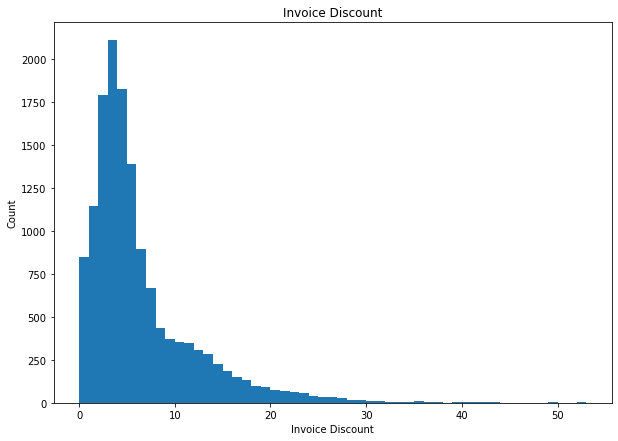

In [57]:
dj=pd.DataFrame()
dj['discount'] = floorFeature_matrix['Invoice Discount']
y1 = dj[dj.discount != 0]
x1 = y1['discount']
plt.hist(x1, range=[0, 53], bins=53) 
plt.title("Invoice Discount") 
plt.xlabel("Invoice Discount") 
plt.ylabel("Count")

In [16]:
floor_df_old = pd.concat([floorFeature_matrix, floorLabel_matrix], axis=1)
floor_df0 = floor_df_old[floor_df_old.QTY_sum != 0]
del (floor_df0['QTY_sum'])
floor_df0 = floor_df0.reset_index(drop=True)
floor_df = floor_df0.sample(frac=1).reset_index(drop=True)     # shuffled
#print (floor_df)

[24.97998613009696, 2197.817795216875, 4080.020013869903, 250.54870158166426, 12053.060120391476, 46.5733828099857]
0.9999999999999998
[0.0013391940240227822, 0.11782650486339326, 0.21873264428616856, 0.013432086076323605, 0.6461727400628035, 0.002496830687288141]


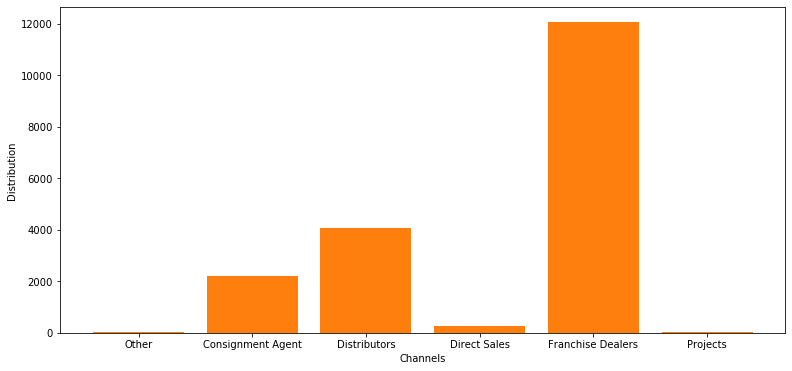

Text(0, 0.5, 'Distribution')

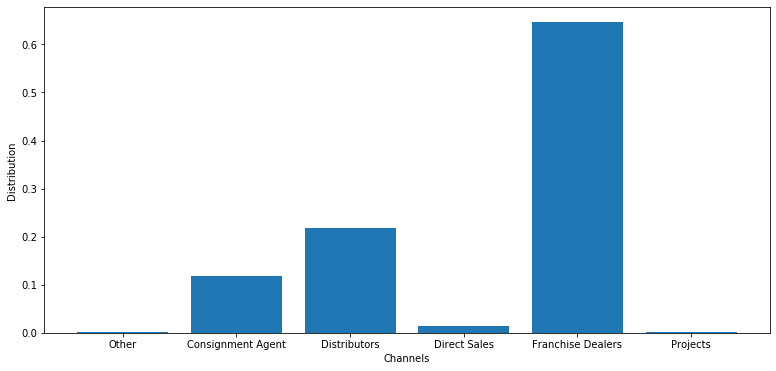

In [59]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6

sales_channels = ['Other','Consignment Agent','Distributors','Direct Sales','Franchise Dealers','Projects']

total = list()
for i in sales_channels:
    total.append(floor_df[i].sum())
    
print (total)
distribution = [x/sum(total) for x in total]
print (sum(distribution))
print (distribution)
plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')

plt.bar(sales_channels, total)
plt.show()

plt.bar(sales_channels, distribution)
plt.xlabel('Channels')
plt.ylabel('Distribution')

In [17]:
from sklearn.model_selection import train_test_split 

array1 = floor_df.values
X = array1[:,0:165]
y = array1[:,165:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)        

In [75]:
#floor_df.to_pickle("./Floortiles_df.pkl")

In [66]:
################# Random Forest #################

from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.ensemble import RandomForestRegressor

rmse_train = list()
rmse_val = list()
#num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750, 1000]
#max_features = ['auto', 'sqrt'] 
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]         # Maximum number of levels in tree   
#max_depth.append(None)
max_depth = [50,60,70,80,90]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4] 
#bootstrap = [True, False]

for x in max_depth:
    reg = RandomForestRegressor(n_estimators=150, max_depth=90)
    reg.fit(X_train, y_train)

    y_pred_train = reg.predict(X_train)
    y_pred_val = reg.predict(X_val)

    print ('max_depth: '+str(x))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    #rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print ('\n')
    #rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    #print (rmse_train)
    #print (rmse_val)
    '''
    dic_train = {'Actual':y_train[800:901,0], 'Predicted':y_pred_train[800:901,0]}
    dic_val = {'Actual':y_val[600:701,0], 'Predicted':y_pred_val[600:701,0]}

    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    df_train = df_train.drop([90])
    df_val = df_val.drop([73])
    df_val = df_val.drop([77])
    print (df_train)
    print (df_val)
    #df_val = df_val.drop([31])

    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()
'''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
#################################################

max_depth: 50
Root Mean Squared Error: 419.35982946075046
Root Mean Squared Error: 797.1922748082588


max_depth: 60
Root Mean Squared Error: 423.86193805596633
Root Mean Squared Error: 818.4802884000934


max_depth: 70
Root Mean Squared Error: 416.7868244464144
Root Mean Squared Error: 807.4650232628245


max_depth: 80
Root Mean Squared Error: 419.8807379053734
Root Mean Squared Error: 810.2294696326369


max_depth: 90
Root Mean Squared Error: 414.00903692209414
Root Mean Squared Error: 795.8380103032948




"\ndf_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})\ndf_RF = df_RF.set_index('No of trees')\nplt.plot(df_RF['RMSE_train'], label='RMSE_train')\nplt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')\nplt.title('RMSE')\nplt.xlabel('No. of trees')\nplt.ylabel('RMSE')\nplt.legend()\nplt.show()\n"

Training RMSE: 461.5394621348088
Validation RMSE: 490.6855036418162


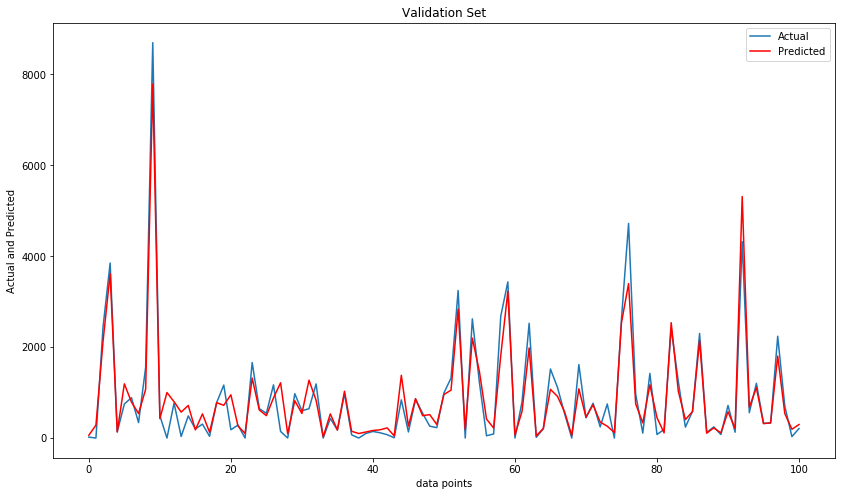

In [18]:
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib 

#regft = RandomForestRegressor(n_estimators=150, max_depth=90)
#regft.fit(X_train, y_train)
   
#joblib.dump(regft, 'C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodelNew.pkl') 
  
Floor_RF = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodelNew.pkl')  
  
y_pred_train = Floor_RF.predict(X_train) 
y_pred_val = Floor_RF.predict(X_val) 
                        
print('Training RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print('Validation RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))) 

#dic_train = {'Actual':y_train[1000:1101,0], 'Predicted':y_pred_train[1000:1101,0]}
dic_val = {'Actual':y_val[400:501,0], 'Predicted':y_pred_val[400:501,0]}

#df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)

#df_val = df_val.drop([31])
#df_val = df_val.drop([95])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

Root Mean Squared Error: 1768.8941790957283
     Actual     Predicted
0     650.0    695.142857
1    8089.0  22068.600000
2     672.0    561.885714
3     608.0    514.900000
4     214.0    168.264286
5    3702.0   2350.700000
6    1218.0    912.478571
7    2438.0   2708.321429
8     996.0    829.164286
9     403.0   1196.585714
10     31.0    162.832143
11    626.0    504.835714
12   1285.0   1859.314286
13  21889.0  22405.292857
14    207.0    223.496194
15   2196.0   1766.242857
16    489.0    459.818615
17    180.0    243.493019
18     66.0     78.957143
19    286.0    440.635714
20     77.0    128.400000
21   3916.0   2958.807143
22   1020.0    763.700000
23    226.0    512.714286
24    178.0    225.428571
25    528.0    670.792857
26    435.0   1274.192857
27   3025.0   2415.721429
28   8248.0   6188.057143
29    876.0    643.039286
30      0.0    144.307143
31   1009.0    713.593318
32     92.0     80.492857
33    356.0    364.088571
34     86.0    125.207143
35    265.0    230.1

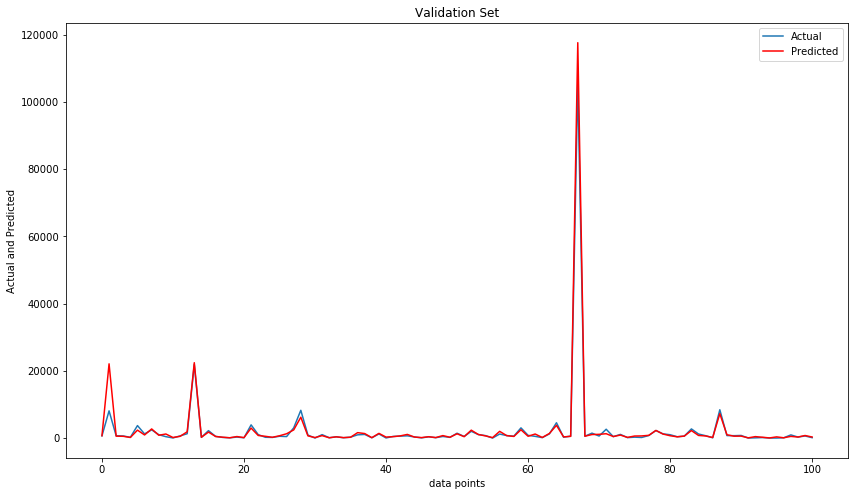

In [34]:
from sklearn.externals import joblib 
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

RF = joblib.load('C:/Users/ChamithM/Desktop/Bestmodels/Floortiles_RFmodel.pkl')  

#X_test = X_val[1].reshape(1, -1)
y_pred_val = RF.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
#print (y_pred)
#y_pred_arr = y_pred.tolist()

dic_val = {'Actual':y_val[500:601,0], 'Predicted':y_pred_val[500:601,0]}

df_val = pd.DataFrame(dic_val)

#df_val.drop([91])
print (df_val[0:50])
print (df_val[50:100])
#print (df_val)
#df_val = df_val.drop([65])
#df_val.drop([70])
#df_val = df_val.drop([95])

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

In [62]:
############## Gradient Boosting ################

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8

rmse_train = list()
rmse_val = list()
num_of_trees = [10, 20, 50, 75, 100, 150, 200, 250, 300, 400, 500, 750]

for trees in num_of_trees:

    #gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=trees, max_depth=4,  min_samples_split=2, min_samples_leaf=2))
    gbr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=trees))
    gbr.fit(X_train, y_train)

    y_pred_train = gbr.predict(X_train)
    y_pred_val = gbr.predict(X_val)

    print ('num of trees: '+str(trees))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print ('\n')
    rmse_val.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
    print (rmse_val)
    print (rmse_train)
    
    '''
    dic_train = {'Actual':y_train[800:901,0], 'Predicted':y_pred_train[800:901,0]}
    dic_val = {'Actual':y_val[600:701,0], 'Predicted':y_pred_val[600:701,0]}
    
    df_train = pd.DataFrame(dic_train)
    df_val = pd.DataFrame(dic_val)
    df_train = df_train.drop([90])
    df_val = df_val.drop([77])
    df_val = df_val.drop([73])
    #print (df_val)
    #print (df_train)
    
    plt.plot(df_train['Actual'], label='Actual')
    plt.plot(df_train['Predicted'], color='red', label='Predicted')
    plt.title('Training Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()

    plt.plot(df_val['Actual'], label='Actual')
    plt.plot(df_val['Predicted'], color='red', label='Predicted')
    plt.title('Validation Set')
    plt.xlabel('data points')
    plt.ylabel('Actual and Predicted')
    plt.legend()
    plt.show()
    '''
'''
df_RF = pd.DataFrame({'No of trees':num_of_trees, 'RMSE_train':rmse_train, 'RMSE_val':rmse_val})
df_RF = df_RF.set_index('No of trees')
plt.plot(df_RF['RMSE_train'], label='RMSE_train')
plt.plot(df_RF['RMSE_val'], color='red', label='RMSE_val')
plt.title('RMSE')
plt.xlabel('No. of trees')
plt.ylabel('RMSE')
plt.legend()
plt.show()
'''
##################################################

num of trees: 10
Root Mean Squared Error: 1149.301274677676
Root Mean Squared Error: 1037.273733208637


[1037.273733208637]
[1149.301274677676]
num of trees: 20
Root Mean Squared Error: 990.8180528078831
Root Mean Squared Error: 921.6482271143516


[1037.273733208637, 921.6482271143516]
[1149.301274677676, 990.8180528078831]
num of trees: 50
Root Mean Squared Error: 860.3824112050354
Root Mean Squared Error: 846.8269374599485


[1037.273733208637, 921.6482271143516, 846.8269374599485]
[1149.301274677676, 990.8180528078831, 860.3824112050354]
num of trees: 75
Root Mean Squared Error: 819.2731847274728
Root Mean Squared Error: 841.9363970387215


[1037.273733208637, 921.6482271143516, 846.8269374599485, 841.9363970387215]
[1149.301274677676, 990.8180528078831, 860.3824112050354, 819.2731847274728]
num of trees: 100
Root Mean Squared Error: 789.945681029926
Root Mean Squared Error: 844.4728367625507


[1037.273733208637, 921.6482271143516, 846.8269374599485, 841.9363970387215, 844.472836

KeyboardInterrupt: 

Using TensorFlow backend.


Epoch 1/40
17352/17352 [==============================] - 4s 210us/step - loss: 53357978.0902 - mean_squared_error: 53357996.0000
Epoch 2/40
17352/17352 [==============================] - 4s 209us/step - loss: 35826110.5509 - mean_squared_error: 35826132.0000
Epoch 3/40
17352/17352 [==============================] - 4s 220us/step - loss: 28938697.1464 - mean_squared_error: 28938692.0000
Epoch 4/40
17352/17352 [==============================] - 4s 226us/step - loss: 28003948.2011 - mean_squared_error: 28003952.0000
Epoch 5/40
17352/17352 [==============================] - 3s 196us/step - loss: 27154859.9958 - mean_squared_error: 27154866.0000
Epoch 6/40
17352/17352 [==============================] - 3s 172us/step - loss: 26453803.5332 - mean_squared_error: 26453814.0000
Epoch 7/40
17352/17352 [==============================] - 3s 166us/step - loss: 25403880.0408 - mean_squared_error: 25403882.0000
Epoch 8/40
17352/17352 [==============================] - 4s 205us/step - loss: 23867947.2

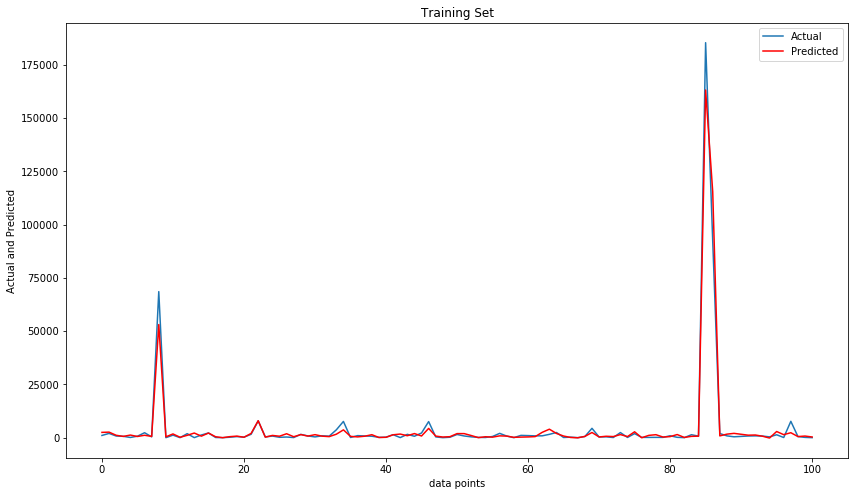

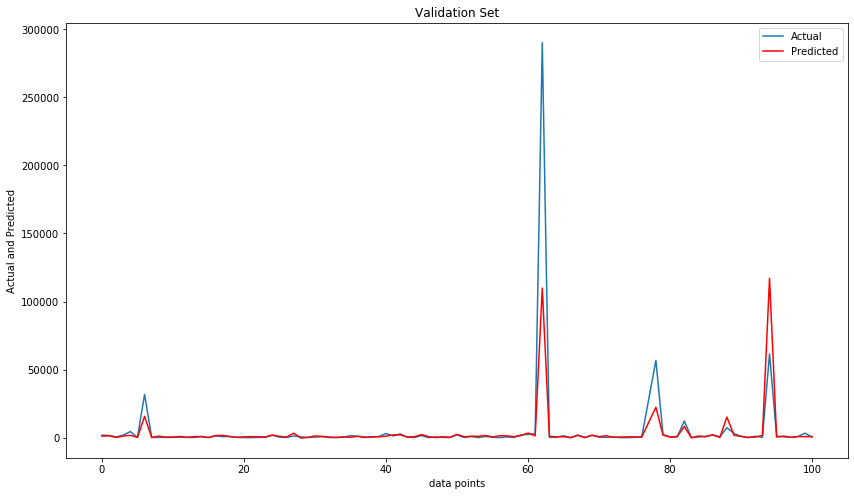

In [16]:
############ Neural Network #############

from sklearn import metrics
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(512, input_dim=169, activation= "relu"))
model.add(Dense(256, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(21, activation= "linear"))

model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=40, batch_size=32, verbose=1)

y_pred_train= model.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

y_pred_val= model.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))

dic_train = {'Actual':y_train[800:901,0], 'Predicted':y_pred_train[800:901,0]}
dic_val = {'Actual':y_val[600:701,0], 'Predicted':y_pred_val[600:701,0]}
    
df_train = pd.DataFrame(dic_train)
df_val = pd.DataFrame(dic_val)
df_val = df_val.drop([77])
#df_val = df_val.drop([31])
#df_val = df_val.drop([80])

df_train = df_train.drop([90])
#df_train = df_train.drop([81])
#df_val = df_val.drop([65])
#df_val = df_val.drop([71])

#print (df_train.iloc[80:101])
#print (df_val.iloc[51:101])
   
plt.plot(df_train['Actual'], label='Actual')
plt.plot(df_train['Predicted'], color='red', label='Predicted')
plt.title('Training Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

plt.plot(df_val['Actual'], label='Actual')
plt.plot(df_val['Predicted'], color='red', label='Predicted')
plt.title('Validation Set')
plt.xlabel('data points')
plt.ylabel('Actual and Predicted')
plt.legend()
plt.show()

#########################################